In [59]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

TP = True Positive   Claimed - Claimed
TN = True Negative   Not Claimed - Not Claimed

FP = False Positive  Claimed - Not Claimed
FN = False Negative  Not Claimed - Claimed

gt:
[ "C" , "NC" , "C" , "C" , "C" , "NC" , "NC" , "NC" , "NC" , "C" , "NC" ,"NC" , "C" , "C" , "NC" , "NC" , "NC" ]

Pred:
[ "NC" , "NC" , "NC" , "NC" , "C" , "NC" , "NC" , "C" , "NC" , "NC" , "C" , "C" , "NC" , "NC" , "NC" , "C" , "NC" ]

TN, FP, TN, TN, TP, FP, FP, FN, FP, TN, FN, FN, TN, TN, FP, FN, FP
TP: 1
TN: 6
FP: 6
FN: 4

Accuracy is number of correctly classified items
TP + TN = 1 + 6 = 7
Accuracy = TP + TN / (TP+TN+FP+FN)      7 / 17 = 0.4117

Sensitivity (True Positve Rate)
Sens = TP/(TP + FN)    = 1/5  = 0.2

Specificity (True Negative Rate)
Spec = TN/(TN + FP)    = 6/12 = 0.5

Precision (Out of all Positive predictions, how many positive)
Prec = TP/(TP + FP)    = 1/7  = 0.14


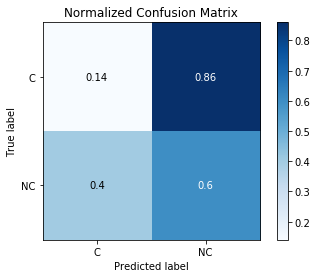

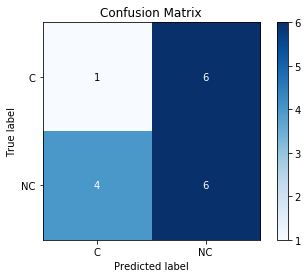

In [60]:
gt = [ "C" , "NC" , "C" , "C" , "C" , "NC" , "NC" , "NC" , "NC" , "C" , "NC" ,
"NC" , "C" , "C" , "NC" , "NC" , "NC" ]

pred = [ "NC" , "NC" , "NC" , "NC" , "C" , "NC" , "NC" , "C" , "NC" , "NC" , "C" ,
"C" , "NC" , "NC" , "NC" , "C" , "NC" ]

skplt.metrics.plot_confusion_matrix(
    gt,
    pred,
    normalize=True,
)
skplt.metrics.plot_confusion_matrix(
    gt,
    pred,
    normalize=False,
)

In [61]:
#Raw Data
sklearn.metrics.confusion_matrix(gt,pred)

array([[1, 6],
       [4, 6]], dtype=int64)

In [62]:
#Raw Data
cm = sklearn.metrics.confusion_matrix(gt, pred)
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(gt,pred).ravel()
print(cm)
print(tn, fp,fn,tp)

[[1 6]
 [4 6]]
1 6 4 6


In [63]:
print (cm.ravel())

[1 6 4 6]


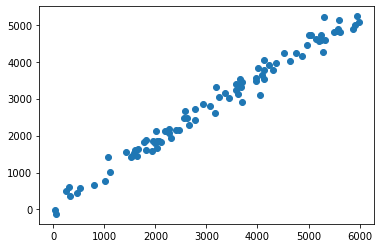

In [64]:
data = pd.read_csv('../toy_data.csv') 
plt.scatter(data.x,data.y)


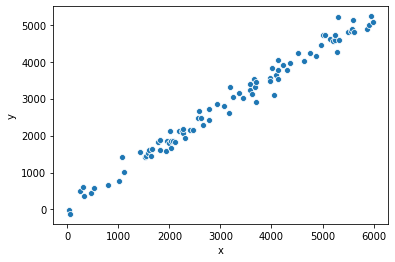

In [65]:
sb.scatterplot(data.x,data.y)

In [66]:
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(data.x, data.y,test_size=0.3, shuffle=False)

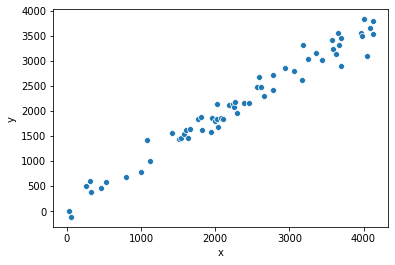

In [67]:
sb.scatterplot(xTrain, yTrain)
#plt.scatter(xTest, yTest)

In [68]:
model = LinearRegression()
print( "Shape before reshaping:" )
print( "Train X" , xTrain)
print( "Train Y" , yTrain)
print( "\n" )

Shape before reshaping:
Train X 0       26
1       58
2      259
3      309
4      323
      ... 
58    4011
59    4045
60    4092
61    4126
62    4128
Name: x, Length: 63, dtype: int64
Train Y 0       -9.210066
1     -120.894408
2      487.066020
3      595.576618
4      376.560146
         ...     
58    3826.507476
59    3086.197970
60    3647.169789
61    3783.842458
62    3536.139337
Name: y, Length: 63, dtype: float64




In [69]:
xTrain = np.asarray(xTrain).reshape(-1,1)
yTrain = np.asarray(yTrain).reshape(-1,1)

xTest = np.asarray(xTest).reshape(-1,1)
yTest = np.asarray(yTest).reshape(-1,1)

In [70]:
reg_model = model.fit(
X=xTrain,
y=yTrain
)

Coefficients: 
 [[0.8661563]]
Mean squared error: 42839.16
Mean absolute error: 165.06
Variance score: 0.75


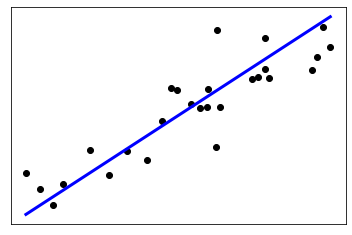

In [71]:
yPred = model.predict(xTest)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(yTest, yPred))
# The absolute
print("Mean absolute error: %.2f" 
      % mean_absolute_error(yTest, yPred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yTest, yPred))

# Plot outputs
plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, yPred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

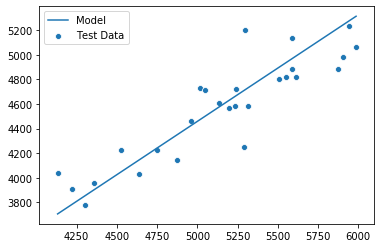

In [72]:
sb.lineplot(x=xTest.ravel(), y=yPred.ravel(), label= 'Model' )
sb.scatterplot(x=xTest.ravel(), y=yTest.ravel(), label= 'Test Data' )

# NEW DATA SET. HARDER

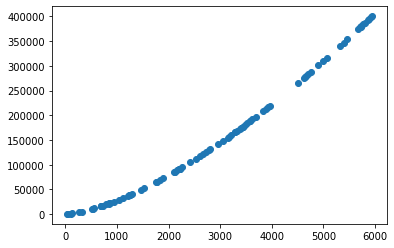

In [73]:
data2 = pd.read_csv('../toy_data_harder.csv') 
plt.scatter(data2.x,data2.y)

# Shuffle = False
Taking first 70% of points as training (70% training)


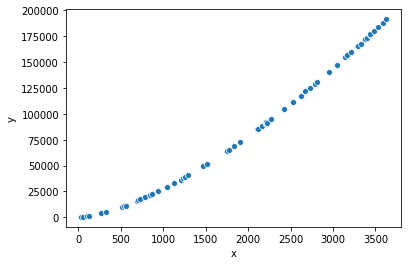

In [74]:
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(data2.x, data2.y,test_size=0.3, shuffle=False)
df = sklearn.model_selection.train_test_split(data2.x, data2.y,test_size=0.3, shuffle=False)
sb.scatterplot(xTrain, yTrain)

In [75]:
xTrain = np.asarray(xTrain).reshape(-1,1)
yTrain = np.asarray(yTrain).reshape(-1,1)

xTest = np.asarray(xTest).reshape(-1,1)
yTest = np.asarray(yTest).reshape(-1,1)

reg_model = model.fit(
X=xTrain,
y=yTrain
)

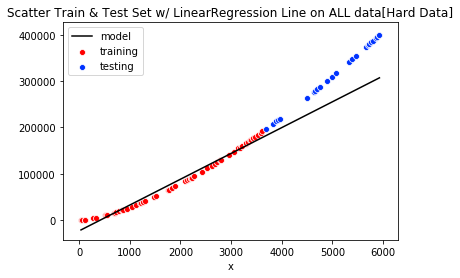

In [76]:
# THIS ISNT WORKING PROPERLY. SEE END OF LAB 5


# Reshape our DataFrame so Sklearn understands it.
whole_x = np.asarray( data2['x'] ).reshape(-1,1)
whole_y = np.asarray( data2['y'] ).reshape(-1,1)
fig, ax = plt.subplots()
plt.title( "Scatter Train & Test Set w/ LinearRegression Line on ALL data[Hard Data]" )
# Line plot of our model applied to ALL our data train + test
sb.lineplot( x=data2['x'], y=reg_model.predict( whole_x ).ravel(), ax=ax, label= 'model' )
# Line plot of just training data. Red Data points
sb.scatterplot(x=xTrain.ravel(), y=yTrain.ravel(), ax=ax, c=[[1, 0, 0]], label= 'training' )
# Line plot of just testing data. Blue-ish data points.
sb.scatterplot(x=xTest.ravel(), y=yTest.ravel(), ax=ax, c=[[0, 0.2, 1]], label= 'testing' )
# Colour the line plot in black.
plt.gca().get_lines()[0].set_color( "black" )
# Show our legend.
ax.legend()

# Shuffle = True
Taking random points from all the data (70% training)


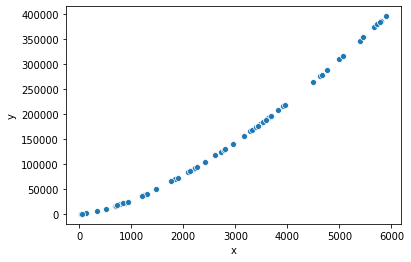

In [77]:
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(data2.x, data2.y,test_size=0.3, shuffle=True)
sb.scatterplot(xTrain, yTrain)

In [78]:
xTrain = np.asarray(xTrain).reshape(-1,1)
yTrain = np.asarray(yTrain).reshape(-1,1)

xTest = np.asarray(xTest).reshape(-1,1)
yTest = np.asarray(yTest).reshape(-1,1)

reg_model = model.fit(
X=xTrain,
y=yTrain
)

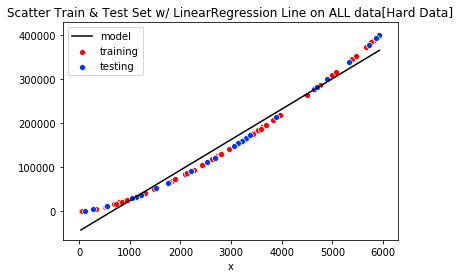

In [79]:
# THIS ISNT WORKING PROPERLY. SEE END OF LAB 5


# Reshape our DataFrame so Sklearn understands it.
whole_x = np.asarray( data2['x'] ).reshape(-1,1)
whole_y = np.asarray( data2['y'] ).reshape(-1,1)
fig, ax = plt.subplots()
plt.title( "Scatter Train & Test Set w/ LinearRegression Line on ALL data[Hard Data]" )
# Line plot of our model applied to ALL our data train + test
sb.lineplot( x=data2['x'], y=reg_model.predict( whole_x ).ravel(), ax=ax, label= 'model' )
# Line plot of just training data. Red Data points
sb.scatterplot(x=xTrain.ravel(), y=yTrain.ravel(), ax=ax, c=[[1, 0, 0]], label= 'training' )
# Line plot of just testing data. Blue-ish data points.
sb.scatterplot(x=xTest.ravel(), y=yTest.ravel(), ax=ax, c=[[0, 0.2, 1]], label= 'testing' )
# Colour the line plot in black.
plt.gca().get_lines()[0].set_color( "black" )
# Show our legend.
ax.legend()